In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [35]:
df.head(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,1,CASH_IN,160347.32,C1972143064,7965270.68,8125617.99,C33524623,724867.22,1517262.16,0,0
496,1,CASH_IN,289272.75,C312168418,8125617.99,8414890.75,C75457651,413976.60,31469.78,0,0
497,1,CASH_IN,63189.26,C95369743,8414890.75,8478080.00,C1860513229,101925.00,0.00,0,0
498,1,CASH_IN,196725.32,C26928827,8478080.00,8674805.32,C451111351,2248012.90,3940085.21,0,0


In [36]:
df.tail(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362120,718,PAYMENT,3311.02,C1779665081,3259.00,0.00,M991872349,0.00,0.00,0,0
6362121,718,PAYMENT,3277.82,C1849451718,8179.00,4901.18,M1298498147,0.00,0.00,0,0
6362122,718,CASH_OUT,166870.75,C994417974,2429.00,0.00,C522662505,93480.91,260351.66,0,0
6362123,718,PAYMENT,9850.63,C1983677230,21085.00,11234.37,M2074854267,0.00,0.00,0,0
6362124,718,TRANSFER,113826.86,C448540919,99349.00,0.00,C895719835,0.00,113826.86,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [9]:
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


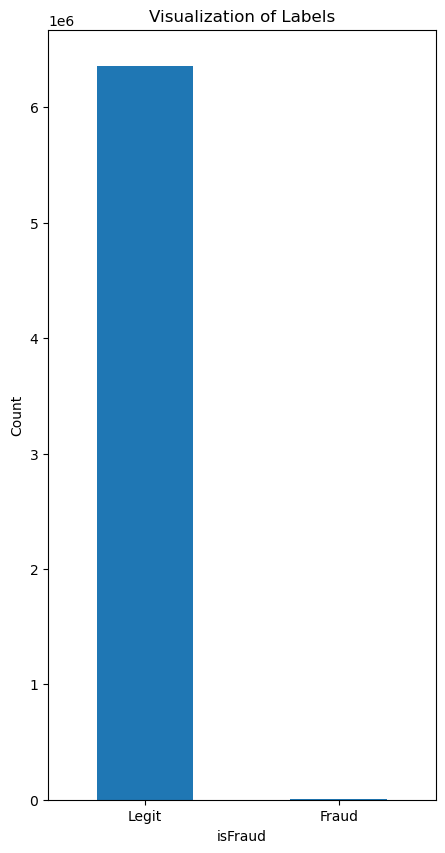

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [12]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [14]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [15]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [16]:
def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)



In [19]:
#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

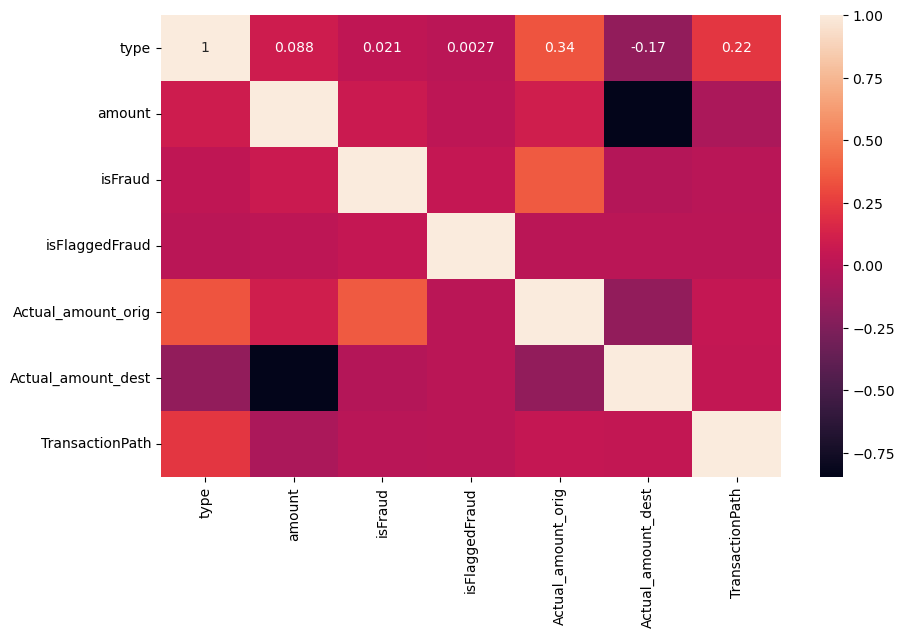

In [21]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [24]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [25]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)


In [37]:
Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:879: RuntimeWarning: invalid value encountered in divide
  proba /= len(self.estimators_)


AttributeError: 'list' object has no attribute 'take'

In [29]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92293531071581
Random Forest Score:  99.95871721607347


In [30]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1720
False Positives: 756
True Negatives: 1905595
False Negatives: 715
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1715
False Positives: 68
True Negatives: 1906283
False Negatives: 720


In [31]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905595     756]
 [    715    1720]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906283      68]
 [    720    1715]]


In [32]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



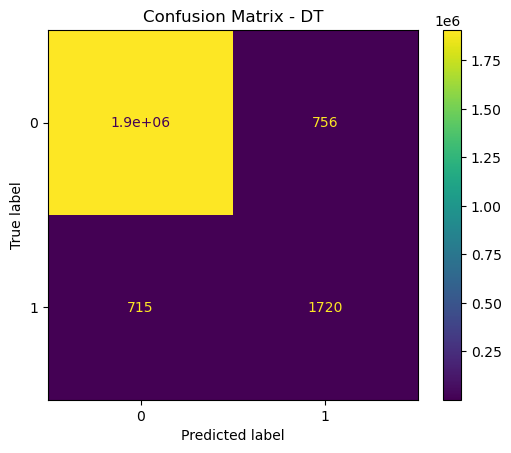

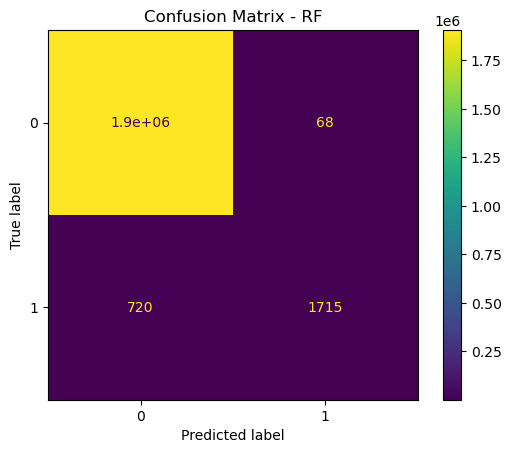

In [33]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

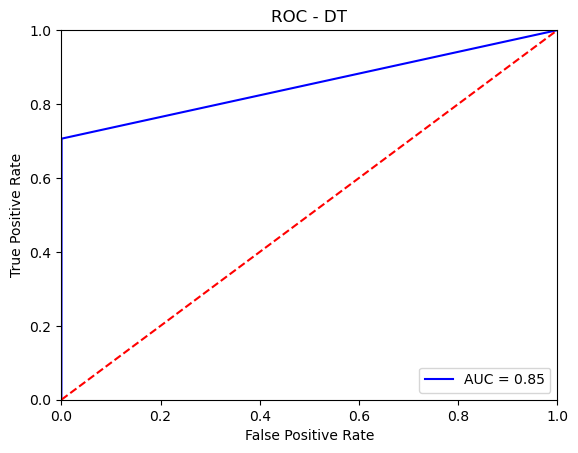

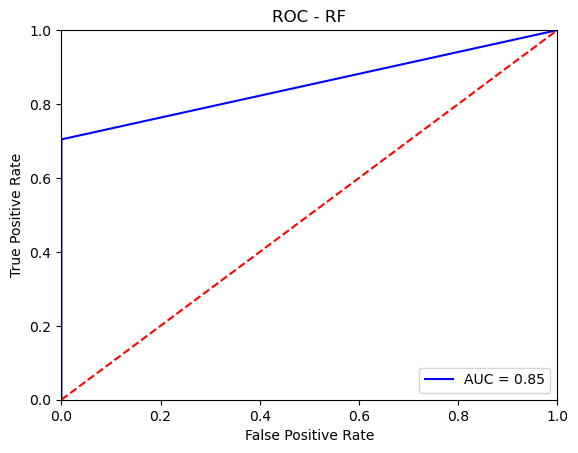

In [34]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CONCLUSION

In [ ]:

We have seen that the accuracy of both Random Forest and Decision Tree is equal, although the precision of Random Forest is higher. In a fraud detection model, precision is highly important because, rather than predicting normal transactions correctly, we want fraud transactions to be predicted correctly and legitimate ones to be left off.
If either of these two criteria is not fulfilled, we may catch the innocent and leave the culprit. This is also one of the reasons why Random Forest and Decision Tree are used instead of other algorithms.
Another reason for choosing these models is the highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random Forest creates multiple decision trees, which makes it easier (although time-consuming) for the model to understand the data in a simpler way since Decision Tree makes decisions in a boolean manner.
Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but won't provide good precision and recall values.

2. Describe your fraud detection model in elaboration.

The fraud detection model utilizes supervised machine learning techniques to identify fraudulent transactions from a dataset. The main steps are as follows:

-Data Preprocessing: Read the dataset, check for missing values, and understand its structure.
-Class Imbalance: Calculate the proportion of legitimate vs. fraudulent transactions.
-Label Encoding: Encode categorical variables using LabelEncoder.
-Feature Engineering: Create new features ('Actual_amount_orig', 'Actual_amount_dest') and drop unnecessary columns.
-VIF Calculation: Check for multicollinearity among features using Variance Inflation Factor.
-Correlation Analysis: Use a heatmap to visualize feature correlations.
-Scaling: Scale the 'amount' feature using StandardScaler.
-Data Splitting: Split the data into training and testing sets.
-Model Training: Train Decision Tree and Random Forest classifiers.
-Model Evaluation: Evaluate models using accuracy, confusion matrices, classification reports, and ROC-AUC curves.

3. How did you select variables to be included in the model?

Variables were selected based on their relevance to the problem of fraud detection and the availability of data. 
Features related to transaction details, such as amounts and balances, are crucial. 
Additionally, feature engineering was employed to create new variables like 'Actual_amount_orig' and 'Actual_amount_dest' that could potentially enhance the model's performance. 
The VIF calculation and correlation analysis helped identify and mitigate multicollinearity issues.

4. Demonstrate the performance of the model by using the best set of tools.

The performance of the Decision Tree and Random Forest models is demonstrated through:

Accuracy Scores:
Decision Tree: 99.95%
Random Forest: 99.98%

Confusion Matrices: These matrices show the counts of true positives, false positives, true negatives, and false negatives.
Classification Reports: These reports provide detailed metrics such as precision, recall, and F1-score for each class.
ROC-AUC Curves: The ROC curves for both models show the trade-off between true positive rate and false positive rate, with the AUC indicating the overall performance.

5. What are the key factors that predict fraudulent transactions?

Key factors that predict fraudulent transactions include:
-The source of request is secured or not ? 
-Is the name of organisation asking for money is legit or not ? 
-Transaction history of vendors..

6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense:
Transaction Amount: Fraudulent transactions often involve amounts that deviate significantly from typical transaction amounts.
Transaction Path: Fraudsters may target specific types of accounts or use certain patterns that differ from legitimate transactions.
Balance Changes: Significant or unusual changes in account balances can be a red flag for fraudulent activity.

7. What kind of prevention should be adopted while the company updates its infrastructure?
To prevent fraud, the company should adopt the following measures: 
-Use smart vertified apps only. -Browse through secured websites. 
-Use secured internet connections (USE VPN). -Keep your mobile and laptop security updated. 
-Don't respond to unsolicited calls/SMS/E-mails. -If you feel like you have been tricked or security compromised, contact your bank immediately. 
-Conduct regular security audits to identify and rectify vulnerabilities.

8. Assuming these actions have been implemented, how would you determine if they work?
-To determine if the prevention measures are effective: 
-Bank sending E-statements. -Customers keeping a check of their account activity. 
-Always keep a log of your payments. 
-Compare the rate of detected fraud before and after implementing the measures. 
-Gather feedback from customers regarding any issues or improvements in transaction security. 
-Conduct thorough analyses of any fraudulent incidents that do occur to understand how they bypassed the prevention measures and adjust accordingly.

​